# **↓↓그래프에서 한글이 깨지는걸 방지하기 위해 아래 코드를 반드시 실행 후 실습을 진행해주세요↓↓**

In [15]:
# ── Matplotlib 한글 폰트(나눔고딕) 설정: Google Colab 기준 ─────────────────────────
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1) 나눔 폰트 설치 (Colab 전용 명령)
!apt-get update -qq
!apt-get install -qq fonts-nanum*

# 2) 폰트 등록: 파일 경로와 폰트 이름 매핑
fe = fm.FontEntry(
    fname="/usr/share/fonts/truetype/nanum/NanumGothic.ttf",
    name="NanumGothic"
)
fm.fontManager.ttflist.insert(0, fe)  # 폰트 목록 최상단에 삽입

# 3) Matplotlib 전역 설정
plt.rcParams.update({
    "font.size": 10,
    "font.family": "NanumGothic"
})
mpl.rcParams["axes.unicode_minus"] = False  # 음수 기호 깨짐 방지

# (선택) 정상 적용 확인
# from matplotlib.font_manager import FontProperties
# print("Resolved font path:", fm.findfont(FontProperties(family="NanumGothic")))

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


### **1-4. 데이터의 '성격' 파악하기: 평균과 표준편차**

이번 시간에는 수백 개의 데이터도 단 몇 개의 숫자로 그 '성격'을 파악하는 마법 같은 기술을 배워볼 거예요\!

#### **🎯 오늘의 목표**

1.  **데이터의 중심 찾기**: 데이터의 '대표 선수'인 **평균**과 **중앙값**을 이해하고 직접 계산해 봅니다.
2.  **데이터의 개성 파악**: 데이터가 얼마나 오순도순 모여있는지, 개성이 강하게 흩어져 있는지 알려주는 **표준편차**를 이해하고 계산해 봅니다.
3.  **종합 분석**: 이 모든 것을 **히스토그램**이라는 그림으로 확인하고, 데이터의 '캐릭터 프로필'을 완성하여 그 의미를 해석합니다.

-----

### **Part 1. 데이터의 '대표 선수' 뽑기: 중심 찾기**

수백 명의 데이터를 한 번에 설명하기는 어렵죠. 그래서 우리는 데이터 전체를 대표할 \*\*'대표 선수'\*\*를 뽑습니다.

#### **1. 평균 (Mean): N분의 1 공평하게\! 🍕**

##### **📜 개념 설명**

**평균**은 가장 유명한 대표 선수로, \*\*"전체 합계를 구해서, 인원수만큼 똑같이 나누는 것"\*\*을 의미합니다. 모든 데이터의 값을 공평하게 반영한다는 장점이 있지만, 엄청나게 크거나 작은 **'튀는 값' 하나에 크게 휘둘리는 약점**이 있어요.

  * **핵심 비유**: 친구 4명이 모여 총 40,000원어치 음식을 먹었다면, "한 사람당 10,000원씩 내자\!"라고 하는 게 바로 평균의 원리예요.

##### **🛠️ 코드 활용법: `np.mean()`**

  * **기능**: 데이터의 **평균**을 구해줘요.
  * **간단 예시**:

In [2]:
import numpy as np

scores = np.array([80, 90, 100])
print(f"평균 점수: {np.mean(scores)}") # 출력: 평균 점수: 90.0

평균 점수: 90.0


##### **✍️ 실전 문제 1: 환자 그룹의 평균 나이 구하기**

아래 10명 환자의 나이 데이터가 있습니다. `np.mean()` 함수를 사용하여 이 그룹의 평균 나이를 계산하고 출력해 보세요.

In [3]:
# 10명 환자의 나이 데이터
ages = np.array([25, 31, 45, 22, 35, 88, 29, 39, 41, 30])

# 아래에 코드를 작성하여 평균 나이를 계산하고 출력하세요.
mean_age = np.mean(ages)
print(f"평균 나이 : {mean_age}")
# mean_age = ...
# print(...)

평균 나이 : 38.5


##### **✅ 정답**

In [4]:
mean_age = np.mean(ages)
print(f"평균 나이 : {mean_age}")

평균 나이 : 38.5


-----

#### **2. 중앙값 (Median): 정확히 한가운데 줄을 서\! 🧍‍♀️🧍‍♂️🧍**

##### **📜 개념 설명**

**중앙값**은 모든 데이터를 크기순으로 쭉 줄 세웠을 때, **정확히 한가운데에 서 있는 값**을 말해요. '튀는 값'의 영향을 거의 받지 않아서, 데이터의 현실적인 중간 지점을 알려줍니다.

  * **핵심 비유**: 우리 반 연봉을 조사하는데, 한 명이 수백억대 부자라고 해봐요. 이 사람 때문에 '평균 연봉'은 비현실적으로 높아지겠죠? 하지만 모두를 줄 세워서 한가운데 사람의 연봉을 보면, 그게 더 현실적인 우리 반의 '보통' 연봉이 될 거예요.

##### **🛠️ 코드 활용법: `np.median()`**

  * **기능**: 데이터의 **중앙값**을 구해줘요.
  * **간단 예시**:

In [5]:
salaries = np.array([3000, 3200, 3100, 8000]) # 튀는 값(8000)이 있음
print(f"연봉 중앙값: {np.median(salaries)}") # 출력: 연봉 중앙값: 3150.0

연봉 중앙값: 3150.0


##### **✍️ 실전 문제 2: 환자 그룹의 나이 중앙값 구하기**

위에서 사용한 `ages` 데이터에 88세라는 '튀는 값'이 있었죠? 이번엔 `np.median()` 함수를 사용해 이 데이터의 **중앙값**을 구하고, 이전 문제에서 구한 평균값과 비교해 보세요.

In [ ]:
# 10명 환자의 나이 데이터
ages = np.array([25, 31, 45, 22, 35, 88, 29, 39, 41, 30])
mean_age = 38.5 # 이전 문제에서 계산한 평균 나이

# 아래에 코드를 작성하여 나이 중앙값을 계산하고, 평균과 비교하는 문장을 출력하세요.
# median_age = ...
# print(...)

##### **✅ 정답**

In [6]:
median_age = np.median(ages)
print(f"평균 나이 : {mean_age}")
print(f"중앙 나이 : {median_age}")

평균 나이 : 38.5
중앙 나이 : 33.0


-----

### **Part 2. 데이터의 '개성' 파악하기: 흩어짐 측정**

대표 선수만 뽑으면 끝이 아니에요\! 데이터가 얼마나 오순도순 모여있는지, 아니면 개성이 강하게 흩어져 있는지도 알아야 진짜 '성격'을 알 수 있죠.

#### **3. 표준편차 (Standard Deviation): 예측 가능성의 척도 🎯**

##### **📜 개념 설명**

**표준편차**는 데이터들이 **평균 주변에 얼마나 오순도순 모여있는지**를 알려주는 숫자예요. 이 숫자가 **작을수록** 데이터가 평균 주변에 모여있어 **안정적이고 예측 가능**하다는 뜻이고, **클수록** 데이터가 넓게 흩어져 있어 **결과를 예측하기 어렵다**는 뜻이에요.

  * **핵심 비유**: 양궁 선수를 생각해 보세요.
      * **A 선수 (표준편차 작음)**: 쏠 때마다 9점, 10점 근처에 화살이 모여요. **'믿고 보는' 안정적인 선수**죠.
      * **B 선수 (표준편차 큼)**: 10점도 맞히지만 5점, 3점도 나와요. 화살이 과녁 전체에 흩어져 있죠. **'기복이 심한' 선수**예요.

##### **🛠️ 코드 활용법: `np.std()`**

  * **기능**: 데이터의 **표준편차**를 구해줘요.
  * **간단 예시**:

In [7]:
class_a_scores = np.array([85, 88, 82]) # 점수가 모여있음 (안정적)
class_b_scores = np.array([100, 60, 95]) # 점수가 흩어져 있음 (기복 심함)
print(f"A반 표준편차: {np.std(class_a_scores):.2f}") # 출력: A반 표준편차: 2.49 (작음)
print(f"B반 표준편차: {np.std(class_b_scores):.2f}") # 출력: B반 표준편차: 18.50 (큼)

A반 표준편차: 2.45
B반 표준편차: 17.80


##### **✍️ 실전 문제 3: 두 환자 그룹의 혈압 안정성 비교하기**

---

A 그룹과 B 그룹 환자들의 혈압 데이터가 있습니다. 두 그룹의 **평균**과 **표준편차**를 각각 계산하여 어느 그룹의 혈압이 더 안정적인지 비교해 보세요.

In [9]:
# A 그룹: 혈압이 비교적 안정적
group_A_bp = np.array([120, 122, 118, 121, 119])
# B 그룹: 혈압의 변동이 큼
group_B_bp = np.array([140, 100, 130, 110, 120])

# 아래에 코드를 작성하여 두 그룹의 평균과 표준편차를 각각 계산하고 비교하는 문장을 출력하세요.
# mean_A = ...
# std_A = ...
# ...

##### **✅ 정답**

In [10]:
mean_A = np.mean(group_A_bp)
std_A = np.std(group_A_bp)
mean_B = np.mean(group_B_bp)
std_B = np.std(group_B_bp)

print(f"A반 평균 : {mean_A}, A반 표준편차 : {std_A} ")
print(f"B반 평균 : {mean_B}, B반 표준편차 : {std_B} ")

A반 평균 : 120.0, A반 표준편차 : 1.4142135623730951 
B반 평균 : 120.0, B반 표준편차 : 14.142135623730951 


-----

### **Part 3. 종합 분석: 데이터의 '캐릭터 프로필' 완성하기**

이제 배운 모든 것을 합쳐, 실제 BMI 데이터의 '캐릭터 프로필'을 완성해 봅시다\!

#### **4. 히스토그램 (Histogram): 데이터의 '생김새' 보기 📊**

##### **📜 개념 설명**

**히스토그램**은 데이터의 전체적인 '모양'을 보여주는 단체 사진이에요. 데이터가 어디에 많이 모여있고, 어떻게 흩어져 있는지 한눈에 보여주죠.

  * **모양 읽기**:
      * **뾰족한 산 모양**: 표준편차가 작다는 뜻\! (데이터가 모여있음)
      * **완만한 언덕 모양**: 표준편차가 크다는 뜻\! (데이터가 흩어져 있음)
      * **예쁜 종 모양**: 평균과 중앙값이 비슷하고, 데이터가 안정적임.
      * **꼬리가 한쪽으로 긴 모양**: '튀는 값'이 있어서 평균과 중앙값이 차이 남.

##### **✍️ 최종 실전 문제: 환자 BMI 데이터 프로필 완성하기**

20명 환자의 BMI 데이터로 평균, 중앙값, 표준편차를 계산하고, 히스토그램 위에 이 정보들을 모두 표시하여 데이터의 '성격'을 종합적으로 분석해 보세요.

In [11]:

# 20명 환자의 BMI 데이터
bmi_data = np.array([24.5, 22.1, 28.3, 25.0, 32.1, 23.8, 26.6, 21.9, 29.5, 24.9,
                   27.1, 23.5, 31.0, 25.8, 22.9, 45.0, 26.2, 24.1, 28.8, 25.5])

# 아래에 코드를 작성하여 다음을 수행하세요.
# 1. bmi_data의 평균, 중앙값, 표준편차를 계산하고 출력하세요.
# 2. bmi_data를 히스토그램으로 시각화하세요. (제목, 라벨 포함)
# 3. 계산된 평균과 중앙값을 각각 다른 스타일의 선으로 히스토그램 위에 표시하세요.

##### **✅ 최종 분석 및 해설**

In [12]:
# 1. 통계치 계산
mean_bmi = np.mean(bmi_data)
median_bmi = np.median(bmi_data)
std_bmi = np.std(bmi_data)


In [13]:
# 2. 결과 출력
print(f"평균 : {mean_bmi},중앙값 : {median_bmi},표준편차 : {std_bmi}")

평균 : 26.93,중앙값 : 25.65,표준편차 : 4.969818910181738


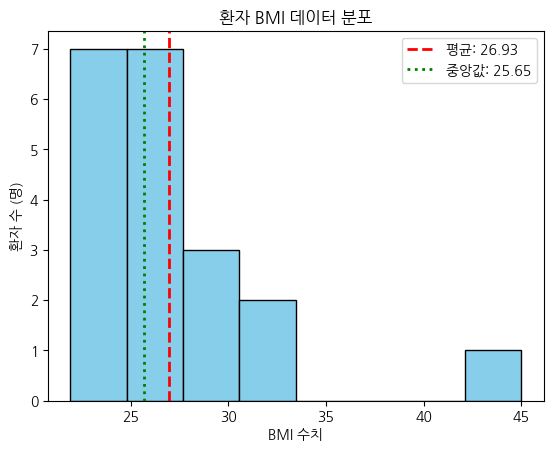

In [14]:
# 3. 히스토그램 시각화
plt.hist(bmi_data, bins=8, color='skyblue', edgecolor='black')
plt.title('환자 BMI 데이터 분포')
plt.xlabel('BMI 수치')
plt.ylabel('환자 수 (명)')
plt.axvline(mean_bmi, color='red', linestyle='--', linewidth=2, label=f'평균: {mean_bmi:.2f}')
plt.axvline(median_bmi, color='green', linestyle=':', linewidth=2, label=f'중앙값: {median_bmi:.2f}')
plt.legend()
plt.show()

-----

### **결론: 그래서 이걸 왜 쓸까요?**

우리가 배운 데이터 요약 기술은 AI와 헬스케어에서 이렇게 쓰여요.

  * **'정상' 범위 설정**: 건강한 사람 수천 명의 혈압 평균과 표준편차를 구해 '정상 혈압' 범위를 정할 수 있어요.
  * **'위험' 신호 감지**: 내 혈압이 평균에서 표준편차의 몇 배 이상 벗어나 있다면, '위험 신호'로 보고 의사에게 알림을 줄 수 있죠.
  * **그룹 비교**: 약을 먹은 그룹과 안 먹은 그룹의 평균 회복 기간을 비교해서 약의 효과를 증명할 수 있어요.

이처럼 데이터의 '캐릭터 프로필'을 만드는 것은, 복잡한 데이터 속에서 의미 있는 정보를 찾아내는 데이터 분석의 가장 기본적이면서도 중요한 첫걸음이랍니다\!